# Problema das Furadeiras
####(contrato horas)

A empresa precisa gastar o minimo com furadeiras.

In [1]:
#Importar
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Importar biblioteca
import pandas as pd
from scipy.optimize import linprog
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##Especificações

Cada furadeira pode ficar em posse da empresa por 5 dias antes de ir para a manutenção que dura dois dias. Então uma furadeira alugada na segunda é operada de segunda a sexta, ficando sábado e domingo na manutenção. Além disso, existem furadeiras de baixo e alto desempenho, as de alto desempenho funcionam 10h por dia e a de baixo somente 5h. Cada dia é necessário certa quantidade de horas de produção para o bom funcionamento da empresa, sendo:
 
- Na segunda precisam de 150 horas  de furadeiras funcionando
- Na terça precisam de 130 horas  de furadeiras funcionando
- Na quarta precisam de 150 horas  de furadeiras funcionando
- Na quinta precisam de 170 horas  de furadeiras funcionando
- Na sexta precisam de 120   horas  de furadeiras funcionando
- No sábado precisam de 130  horas  de furadeiras funcionando
- No domingo precisam de 110 horas  de furadeiras funcionando
 
As variáveis de decisão são:
 
- x10 -> Furadeira de alta qualidade iniciada na Segunda
- x20 -> Furadeira de alta qualidade iniciada na Terça
- x30 -> Furadeira de alta qualidade iniciada na Quarta
- x40 -> Furadeira de alta qualidade iniciada na Quinta
- x50 -> Furadeira de alta qualidade iniciada na Sexta
- x60 -> Furadeira de alta qualidade iniciada na Sábado
- x70 -> Furadeira de alta qualidade iniciada na Domingo
 
- x11 -> Furadeira de baixa qualidade iniciada na Segunda
- x21 -> Furadeira de baixa qualidade iniciada na Terça
- x31 -> Furadeira de baixa qualidade iniciada na Quarta
- x41 -> Furadeira de baixa qualidade iniciada na Quinta
- x51 -> Furadeira de baixa qualidade iniciada na Sexta
- x61 -> Furadeira de baixa qualidade iniciada na Sábado
- x71 -> Furadeira de baixa qualidade iniciada na Domingo
 
O contrato da empresa com a locadora diz que cada hora do aluguel de uma furadeira de boa qualidade custa 15 realetas, enquanto a de baixa qualidade paga somente 10 realetas. A locadora, para garantir que tenha todas as furadeiras a ser alugadas, colocou a regra de que só podem alugar até 25% de furadeiras de baixo desempenho.
 
Usando as restrições chega-se as seguintes funções:

Minimizacao: 

$750(x10 + x20 + x30 + x40 + x50 + x60 + x70) + 250(x11 + x21 + x31 + x41 + x51 + x61 + x71) = z$
<br>
Segunda:
<br>
$10(x10 + x40 + x50 + x60 + x70) + 5(x11 + x41 + x51 + x61 + x71) \geq 150$
<br>
Terça:
<br>
$10(x10 + x20 + x50 + x60 + x70) + 5(x11 + x21 + x51 + x61 + x71) \geq 130$
<br>
Quarta:
<br>
$10(x10 + x20 + x30 + x60 + x70) + 5(x11 + x21 + x31 + x61 + x71) \geq 150$
<br>
Quinta:
<br>
$10(x10 + x20 + x30 + x40 + x70) + 5(x11 + x21 + x31 + x41 + x71) \geq 170$
<br>
Sexta:
<br>
$10(x10 + x20 + x30 + x40 + x50) + 5(x11 + x21 + x31 + x41 + x51) \geq 120$
<br>
Sábado:
<br>
$10(x20 + x30 + x40 + x50 + x60) + 5(x21 + x31 + x41 + x51 + x61) \geq 130$
<br>
Domingo:
<br>
$10(x30 + x40 + x50 + x60 + x70) + 5(x31 + x41 + x51 + x61 + x71) \geq 110$
<br>
Total_Semanal:
<br> 
$75(x11 + x21 + x31 + x41 + x51 + x61 + x71) - 50(x10 + x20 + x30 + x40 + x50 + x60 + x70) \leq 0$

A função objetiva é o custo da furadeira multiplicado pelo respectivo número de contratações. O custo de uma furadeira de alto desempenho é de 750 realetas. Pois quando ela é alugada ela fica em posse da da empresa por 5 dias e trabalha 10 horas por dia, a cada hora 15 realetas. Com a de baixo desempenho será 250 pois 5 dias, 5 horas por dia, cada hora 10 realetas.

As equações de restrição dos dias é o somatório das furadeiras de alto desempenho operando no dia * 10 mais  somatório das furadeiras de baixo desempenho operando no dia * 5. 10 e 5 porque é o limite de funcionamento de cada tipo.
 
A equação Total_Semanal refere-se ao limite de empréstimo máximo das furadeiras de baixo rendimento. O somatório das horas trabalhadas por elas deve ser menor que 25% do somatório total de horas, ou seja:
 
25(x11 + x21 + x31 + x41 + x51 + x61 + x71) <= 0.25(25(x11 + x21 + x31 + x41 + x51 + x61 + x71)+ 50(x10 + x20 + x30 + x40 + x50 + x60 + x70)) 

<br>

$25(x11 + x21 + x31 + x41 + x51 + x61 + x71) \leq 0.25(25(x11 + x21 + x31 + x41 + x51 + x61 + x71)+ 50(x10 + x20 + x30 + x40 + x50 + x60 + x70)) $ 

In [3]:
df = pd.read_csv("/content/drive/MyDrive/7 periodo/PO/Prova/Prova_Furadeira_Horas.csv")
df

,Unnamed: 0,v_Segunda,v_Segunda1,v_Terca,v_Terca1,v_Quarta,v_Quarta1,v_Quinta,v_Quinta1,v_Sexta,v_Sexta1,v_Sabado,v_Sabado1,v_domingo,v_domingo1,Minimo de Furadeiras
0,Funcao,750,250,750,250,750,250,750,250,750,250,750,250,750,250,z
1,Segunda,10,5,0,0,0,0,10,5,10,5,10,5,10,5,150
2,Terca,10,5,10,5,0,0,0,0,10,5,10,5,10,5,130
3,Quarta,10,5,10,5,10,5,0,0,0,0,10,5,10,5,150
4,Quinta,10,5,10,5,10,5,10,5,0,0,0,0,10,5,170
5,Sexta,10,5,10,5,10,5,10,5,10,5,0,0,0,0,120
6,Sabado,0,0,10,5,10,5,10,5,10,5,10,5,0,0,130
7,Domingo,0,0,0,0,10,5,10,5,10,5,10,5,10,5,110
8,Total_Semanal,-50,75,-50,75,-50,75,-50,75,-50,75,-50,75,-50,75,0


In [4]:
df.shape

(9, 16)


A seguir tem a funcao de minimizacao, o total de horas de cada tipo de furadeira contratada na semana.

In [5]:
#Funcao de Minimizacao
z = df.iloc[0, 1:(df.shape[1]-1)].to_numpy(dtype="float32")
z

array([750., 250., 750., 250., 750., 250., 750., 250., 750., 250., 750.,
       250., 750., 250.], dtype=float32)

In [6]:
#Limites superiores
A_liminf = df.iloc[1:df.shape[0], 1:(df.shape[1]-1)].to_numpy(dtype="float32")
A_liminf

array([[ 10.,   5.,   0.,   0.,   0.,   0.,  10.,   5.,  10.,   5.,  10.,
          5.,  10.,   5.],
       [ 10.,   5.,  10.,   5.,   0.,   0.,   0.,   0.,  10.,   5.,  10.,
          5.,  10.,   5.],
       [ 10.,   5.,  10.,   5.,  10.,   5.,   0.,   0.,   0.,   0.,  10.,
          5.,  10.,   5.],
       [ 10.,   5.,  10.,   5.,  10.,   5.,  10.,   5.,   0.,   0.,   0.,
          0.,  10.,   5.],
       [ 10.,   5.,  10.,   5.,  10.,   5.,  10.,   5.,  10.,   5.,   0.,
          0.,   0.,   0.],
       [  0.,   0.,  10.,   5.,  10.,   5.,  10.,   5.,  10.,   5.,  10.,
          5.,   0.,   0.],
       [  0.,   0.,   0.,   0.,  10.,   5.,  10.,   5.,  10.,   5.,  10.,
          5.,  10.,   5.],
       [-50.,  75., -50.,  75., -50.,  75., -50.,  75., -50.,  75., -50.,
         75., -50.,  75.]], dtype=float32)

In [7]:
b_inf = df.iloc[1:df.shape[0], -1].to_numpy(dtype="float32")
b_inf

array([150., 130., 150., 170., 120., 130., 110.,   0.], dtype=float32)

Para o bom funcionamento da funcao em Python deve-se multiplicar o vetor b e a matriz A_liminf, por "-1", visto q sao limites inferiores e a funcao de minimizacao so aceita os superiores.


In [8]:
A_limsup =  A_liminf*-1
b_sup = b_inf*-1
A_limsup[len(A_limsup)-1] = A_limsup[len(A_limsup)-1]*-1
b_sup[len(b_sup)-1] = b_sup[len(b_sup)-1]*-1
print(A_limsup)
print(b_sup)

[[-10.  -5.  -0.  -0.  -0.  -0. -10.  -5. -10.  -5. -10.  -5. -10.  -5.]
 [-10.  -5. -10.  -5.  -0.  -0.  -0.  -0. -10.  -5. -10.  -5. -10.  -5.]
 [-10.  -5. -10.  -5. -10.  -5.  -0.  -0.  -0.  -0. -10.  -5. -10.  -5.]
 [-10.  -5. -10.  -5. -10.  -5. -10.  -5.  -0.  -0.  -0.  -0. -10.  -5.]
 [-10.  -5. -10.  -5. -10.  -5. -10.  -5. -10.  -5.  -0.  -0.  -0.  -0.]
 [ -0.  -0. -10.  -5. -10.  -5. -10.  -5. -10.  -5. -10.  -5.  -0.  -0.]
 [ -0.  -0.  -0.  -0. -10.  -5. -10.  -5. -10.  -5. -10.  -5. -10.  -5.]
 [-50.  75. -50.  75. -50.  75. -50.  75. -50.  75. -50.  75. -50.  75.]]
[-150. -130. -150. -170. -120. -130. -110.    0.]


Aplicar funcao de minimizacao

In [9]:
#Aplicar Funcao 
res = linprog(z, A_ub = A_limsup, b_ub = b_sup, method = 'simplex')
res

     con: array([], dtype=float64)
     fun: 13750.0
 message: 'Optimization terminated successfully.'
     nit: 8
   slack: array([ 0.,  0.,  0.,  0., 40.,  0.,  0.,  0.])
  status: 0
 success: True
       x: array([ 1., 10.,  3.,  0.,  2.,  0.,  5.,  0.,  0.,  0.,  3.,  0.,  1.,
        0.])

Com essa resposta pode-se observar que o custo minimo eh de 13750 reais, e:
- Segunda 1 alta qualidade 10 baixa qualidade
- Terca 3 alta qualidade
- Quarta 2 alta qualidade
- Quinta 5 alta qualidade
- Sexta - 
- Sabado 3 alta qualidade
- Domingo 1 alta qualidade

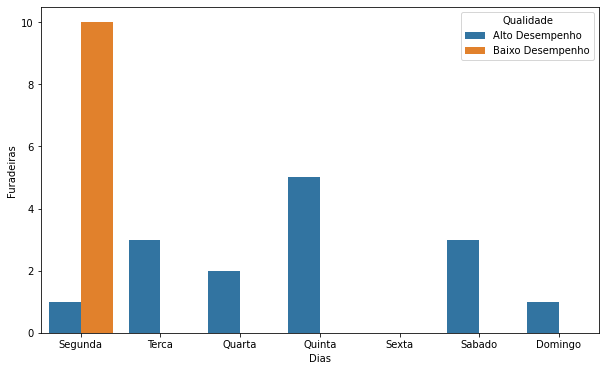

In [12]:
dias = np.array(["Segunda","Segunda",
                 "Terca", "Terca",
                 "Quarta", "Quarta",
                 "Quinta", "Quinta",
                 "Sexta", "Sexta",
                 "Sabado", "Sabado",
                 "Domingo", "Domingo"])
qualidade = []

for i in range(len(res.x)):
  if i%2 == 0:
    qualidade.append("Alto Desempenho")
  else:
    qualidade.append("Baixo Desempenho")

furadeiras = np.array(res.x)

dic = {
    "Dias": dias,
    "Qualidade": qualidade,
    "Furadeiras": furadeiras
}

df1 = pd.DataFrame(dic)

plt.figure(figsize=(10, 6))
sns.barplot(x="Dias", hue="Qualidade", y="Furadeiras", data=df1)
plt.show()
